<a href="https://colab.research.google.com/github/vic-comm/deep-learning-pytorch/blob/main/image_classification_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torch import optim
import pandas as pd

In [ ]:
train_data_path = "train"
transform = transforms.Compose([transforms.ToTensor()])
train_data = torchvision.datasets.FashionMNIST(root=train_data_path,transform=transform, download=True, train=True)
test_data = torchvision.datasets.FashionMNIST(root=train_data_path,transform=transform, download=True, train=False)

In [ ]:
print(len(train_data))

60000


In [ ]:
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: train
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.286], std=[0.353])
           )


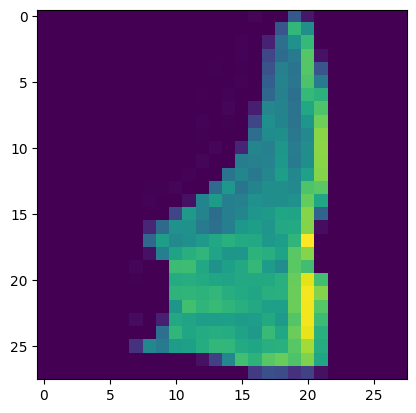

In [ ]:
img, label = test_data[0]
plt.imshow(img.permute(2, 1, 0))
plt.show()

In [ ]:
print(label, img.shape)

9 torch.Size([1, 28, 28])


In [ ]:
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
imgs = torch.stack([img for img, label in train_data], dim=1)
imgs.shape

torch.Size([1, 60000, 28, 28])

In [ ]:
# Normalize data
mean = imgs.view(1, -1).mean(dim=1)
sd = imgs.view(1, -1).std(dim=1)
print(mean, sd)

tensor([0.2860]) tensor([0.3530])


In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
# Building the model
class Vicnet(nn.Module):
  def __init__(self, num_classes):
    super().__init__()
    self.num_classes = num_classes
    self.features = nn.Sequential(nn.Conv2d(1, 64, kernel_size=5, padding=1, stride=1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=3, stride=1),
                                  nn.Conv2d(64, 128, kernel_size=5, padding=2),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=3, stride=1),
                                  nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=3, stride=1),
                                  nn.Conv2d(256, 64, kernel_size=3, padding=1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=3, stride=2))

    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
    # Added droupout for regularization
    self.classifier = nn.Sequential(nn.Dropout(),
                                    nn.Linear(64 * 6 * 6, 4096),
                                    nn.ReLU(),
                                    nn.Dropout(),
                                    nn.Linear(4096, 4096),
                                    nn.ReLU(),
                                    nn.Linear(4096, num_classes))

  def forward(self, x):
    x = self.features(x)
    x = self.avgpool(x)
    x = torch.flatten(x, 1)
    out = self.classifier(x)
    return out



In [ ]:
model = Vicnet(10)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
def training_loop(epochs, model, optimizer, loss_fn, train_loader):
  for epoch in range(1, epochs+1):
    total_loss = 0
    for img, label in train_loader:
      pred = model(img)
      loss = loss_fn(pred, label)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

    if epoch == 1 or epoch % 10 == 0:
      # Prints the average loss per batch
      print('Epoch {}, Training loss {}'.format(epoch, total_loss / len(train_loader)))

In [ ]:
# Validating the model using test data
def validate(model, train, test):
  for name, loader in [('train', train_loader), ('test', test_loader)]:
    total = 0
    correct = 0

    with torch.inference_mode():
      for imgs, labels in loader:
        output = model(imgs)
        _, predicted = torch.max(output, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

      print("Accuracy {}: {:.2f}".format(name , correct / total))

In [ ]:
training_loop(100, model, optimizer, loss_fn, train_loader)

KeyboardInterrupt: 

In [ ]:
for i in

TypeError: 'DataLoader' object is not subscriptable